In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [4]:
df = pd.read_csv("../Python/Output/FFT_Lib_Linear_18.txt", sep='\t')
df.head()

,SinSource,NoiseType,Noise,Signal,Order,Freq,Test,Uncertainty Mean,Uncertainty Deviation,Uncertainty Minimum,...,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0
0,LibSin,Gaussian,0,Linear,18,0,Forward,1.022455e-08,1.622977e-08,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,LibSin,Gaussian,0,Linear,18,0,Reverse,1.959236e-11,7.026956e-12,1.028880e-11,...,0.000105,0.000209,0.000209,0.000131,0.000131,0.000183,0.000131,0.000262,0.000236,0.000079
2,LibSin,Gaussian,0,Linear,18,0,Roundtrip,4.185046e-11,4.686072e-12,3.666401e-11,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
sHisto = [str(i/1) for i in range(-2000, 2001, 1)]
df[sHisto].head()

,-2000.0,-1999.0,-1998.0,-1997.0,-1996.0,-1995.0,-1994.0,-1993.0,-1992.0,-1991.0,...,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000209,0.000157,0.000262,0.000209,0.000236,0.00034,0.000183,0.000288,0.000209,0.00034,...,0.000105,0.000209,0.000209,0.000131,0.000131,0.000183,0.000131,0.000262,0.000236,0.000079
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
def PlotHistogram( order, noise, sinSource, signal, freq=0, ylim=[] ):
    signalName = 'Sin/Cos' if signal=='Aggr' else signal if signal=='Linear' else f'{signal} freq={freq}'
    df['legend'] = df['Test']

    dfHisto = df[(df['Order']==order) & (df['Noise']==noise) & (df['SinSource']==sinSource) & (df['Signal']==signal) & (df['Freq']==freq)]\
                .set_index('legend')
    ax = dfHisto[sHisto].T.plot(style=['m-', 'g-', 'b-', 'mx', 'gx', 'bx'],
                           title=f'{signalName} order={order} noise={noise} using {sinSource}')
    ax.set_xlabel('Normalized Error')
    ax.set_ylabel('Normalized Histogram Count')
    if ylim:
        ax.set_ylim(ylim)

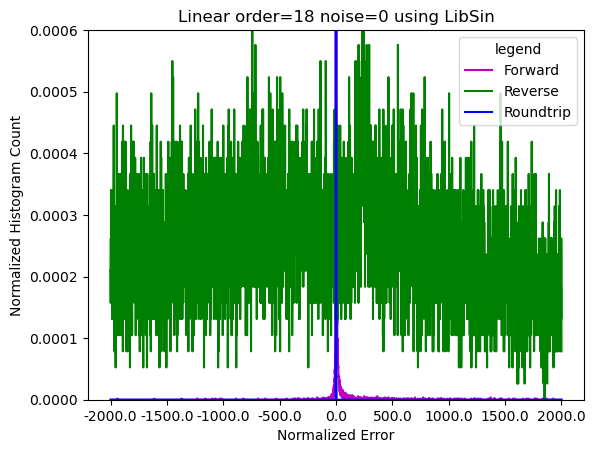

In [12]:
PlotHistogram(18, 0, 'LibSin', 'Linear', ylim=[0, 6e-4])